In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
datafile = '/content/drive/MyDrive/CodingDojo/Project1/ProjectDataSet_sales_predictions.csv'
df = pd.read_csv(datafile)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
df.info() # to check data type and which columns has Nan values, here Item_Weight and Outlet_Size columns have Nan values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df.duplicated().any() # to check for any duplicates

False

In [10]:
#to locate Nan values in Item_Weight 
Nan_Values1 = pd.isnull(df['Item_Weight'])
df[Nan_Values1].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [11]:
Nan_Values1.value_counts() # to count Nan values in Item_Weight column

False    7060
True     1463
Name: Item_Weight, dtype: int64

In [12]:
Nan_Values2 = pd.isnull(df['Outlet_Size']) #to locate Nan values in Outlet_Size column 
df[Nan_Values2].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [13]:
Nan_Values2.value_counts() # to count total Nan values in Outlet_Size column

False    6113
True     2410
Name: Outlet_Size, dtype: int64

# More than thousand values are missing in both the columns
# Since missing values are in very large number, filling missing values is better idea than dropping all of them 

In [14]:
#filling Nan values in all NON-Object columns which is Item_Weight for this Dataframe
# We will use interpolate method to fill missing values for Item_Weight column 
# note that this method only works for int or floats
New_df=df.interpolate(method ='linear', limit_direction ='forward')
New_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,14.925,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


source: https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/

In [15]:
New_df.isna().sum() # Outlet_Size column still has Nan values

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
#filling Nan values in Outlet_Size 
final_df = New_df.fillna(method ='pad')
final_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [17]:
final_df.isna().sum() # No Nan values in new dataframe

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
final_df.duplicated().any() #to check there is no duplicate rows after filling values

False

In [19]:
final_df['Item_Fat_Content'].value_counts() #to check string inconsistency in Object column

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [20]:
#to make all string consistent in the column Item Fat content
final_df.loc[final_df['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'
final_df.loc[final_df['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
final_df.loc[final_df['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'

In [21]:
final_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,14.925,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [22]:
### Following commands used to check any string inconsistency in  
###Object columns' values and NO INCONSITETNCY OBSEVED
#final_df['Item_Type'].value_counts() 
#final_df['Outlet_Establishment_Year'].value_counts()
#final_df['Outlet_Size'].value_counts()
#final_df['Outlet_Location_Type'].value_counts()
#final_df['Outlet_Type'].value_counts()

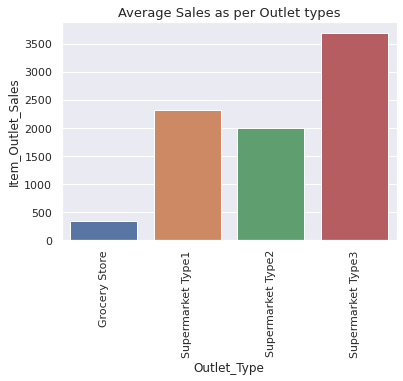

In [23]:
#CALCULATING MEAN VALUE OF SALES AS OUTLET TYPE
sale_type_groupby = final_df.groupby(['Outlet_Type'], as_index= False)['Item_Outlet_Sales'].mean()

#plt.figure(figsize=(9,5))
sns.set_theme(style='darkgrid', context='notebook');

sns.barplot(x=sale_type_groupby['Outlet_Type'], 
            y=sale_type_groupby['Item_Outlet_Sales']);

plt.xticks(rotation=90);

plt.title("Average Sales as per Outlet types", fontsize=13);

In [24]:
final_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

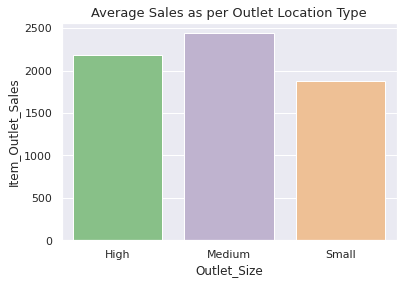

In [25]:
#CALCULATING MEAN VALUE OF SALES AS OUTLET SIZE
sale_size_groupby = final_df.groupby(['Outlet_Size'], as_index= False)['Item_Outlet_Sales'].mean()

sns.set_theme(style='darkgrid', context='notebook');

sns.barplot(x=sale_size_groupby['Outlet_Size'], 
            y=sale_size_groupby['Item_Outlet_Sales'], 
            palette='Accent');

plt.title("Average Sales as per Outlet Location Type", 
              fontsize=13);

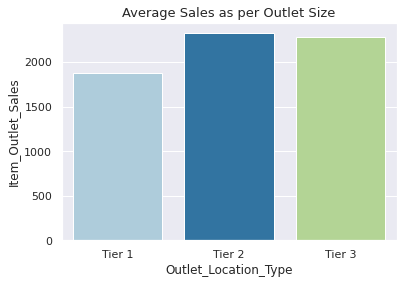

In [26]:
#CALCULATING MEAN VALUE OF SALES AS OUTLET LOCATION
sale_location_groupby = final_df.groupby(['Outlet_Location_Type'], as_index= False)['Item_Outlet_Sales'].mean()

sns.set_theme(style='darkgrid', context='notebook');

sns.barplot(x=sale_location_groupby['Outlet_Location_Type'], 
            y=sale_location_groupby['Item_Outlet_Sales'], 
            palette='Paired');

plt.title("Average Sales as per Outlet Size", 
              fontsize=13);

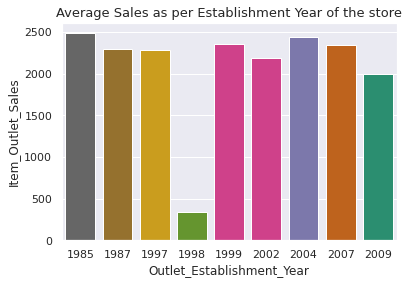

In [27]:
sale_establishment_groupby = final_df.groupby(['Outlet_Establishment_Year'], as_index= False)['Item_Outlet_Sales'].mean()

sns.set_theme(style='darkgrid', context='notebook');
sns.barplot(x=sale_establishment_groupby['Outlet_Establishment_Year'],y=sale_establishment_groupby['Item_Outlet_Sales'],
            palette='Dark2_r');
plt.title("Average Sales as per Establishment Year of the store", 
              fontsize=13);

SO far Outlet related data have been observed

Data related to item 

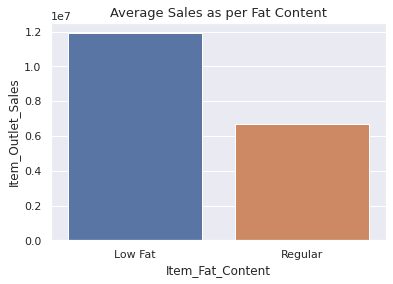

In [28]:
#CALCULATING MEAN VALUE OF SALES AS ITEM FAT CONTENT
sale_fat_groupby = final_df.groupby(['Item_Fat_Content'], as_index= False)['Item_Outlet_Sales'].sum()

#sns.set_theme(style='darkgrid', context='notebook'); CHECK Default theme
sns.barplot(x=sale_fat_groupby['Item_Fat_Content'], 
            y=sale_fat_groupby['Item_Outlet_Sales'], 
            palette='deep');

plt.title("Average Sales as per Fat Content", 
              fontsize=13);

In [29]:
ItemType_groupby = final_df.groupby(['Item_Type'], as_index=False)['Item_Outlet_Sales'].sum().sort_values(by='Item_Outlet_Sales', ascending = False)

In [30]:
maxItemtypesale = ItemType_groupby['Item_Outlet_Sales'].max()
minItemtypesale = ItemType_groupby['Item_Outlet_Sales'].min()

print(minItemtypesale)
print(maxItemtypesale)

148868.2194
2820059.8168000015


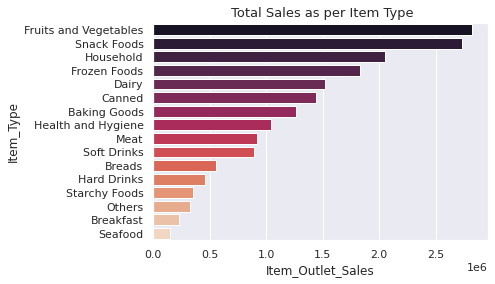

In [31]:
#sns.set_theme(style='darkgrid', context='notebook'); CHECK Default theme
sns.barplot(x=ItemType_groupby['Item_Outlet_Sales'], 
            y=ItemType_groupby['Item_Type'], 
            palette='rocket');
#plt.ylim(0, 3000000)
#plt.xticks(rotation=90);
plt.title(" Total Sales as per Item Type", 
              fontsize=13);

Sales are more inclined to fruits and Vegetables and snack foods and less to seafood 

In [32]:
final_df.groupby(['Item_Type', 'Item_Identifier'],as_index=False)['Item_Outlet_Sales'].sum().sort_values(by='Item_Outlet_Sales', 
                                                                                         ascending = False).head(20)
#pending work - provide Item type in graph over bars

,Item_Type,Item_Identifier,Item_Outlet_Sales
792,Fruits and Vegetables,FDY55,42661.8008
332,Dairy,FDA15,41584.5364
797,Fruits and Vegetables,FDZ20,40185.0248
461,Frozen Foods,FDF05,36555.7490
429,Frozen Foods,FDA04,35741.4756
373,Dairy,FDK03,34843.9772
1055,Household,NCQ06,34680.1904
893,Health and Hygiene,NCQ53,34508.4140
1117,Meat,FDJ55,33531.0196
620,Fruits and Vegetables,FDD44,32723.4042


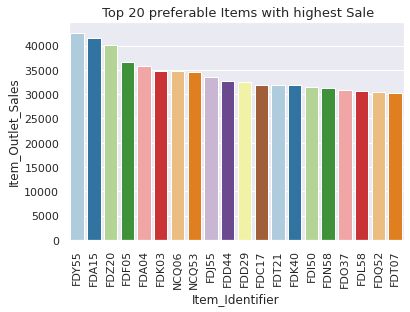

In [33]:
ItemID_groupby = final_df.groupby(['Item_Identifier'], 
                                  as_index=False)['Item_Outlet_Sales'].sum().sort_values(by='Item_Outlet_Sales', 
                                                                                         ascending = False).head(20)

sns.barplot(x=ItemID_groupby['Item_Identifier'], 
            y=ItemID_groupby['Item_Outlet_Sales'], 
            palette='Paired');

plt.xticks(rotation=90);
plt.title(" Top 20 preferable Items with highest Sale", 
              fontsize=13);

In [34]:
ItemVis = final_df[['Item_Visibility', 'Item_Weight', 'Item_MRP', 'Item_Outlet_Sales']]


In [35]:
#sns.regplot(x=df["sepal_length"], y=df["sepal_width"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

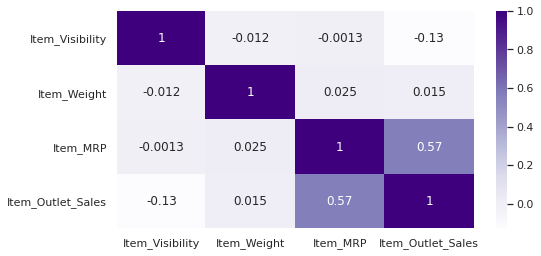

In [53]:
plt.figure(figsize=(8,4))
# get correlation between values (this is peasons correlation if you are familiar)
corr = ItemVis.corr()
sns.heatmap(corr, cmap='Purples', annot=True);

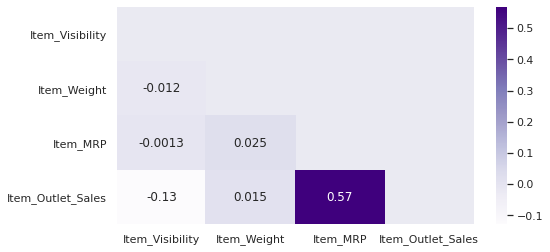

In [54]:
# with mask
plt.figure(figsize=(8,4))
corr_matrix=ItemVis.corr()

# mask to get rid of top half
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, cmap='Purples', annot=True, mask=mask);
